In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Notebook for the competition: https://www.kaggle.com/competitions/pnevmoniya

# Preparing for deep learning

In [25]:
path = Path('/kaggle/input/pnevmoniya/train')
path.ls()

(#2) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA'),Path('/kaggle/input/pnevmoniya/train/NORMAL')]

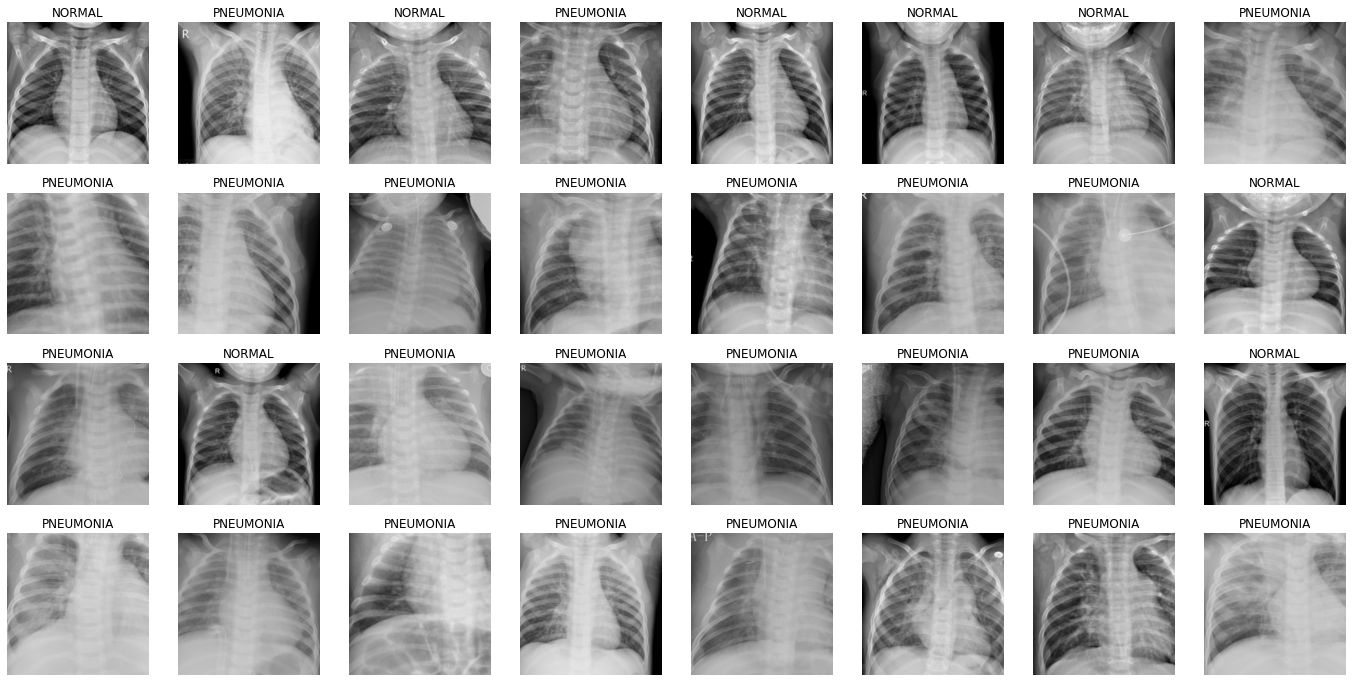

In [26]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = data.dataloaders(path)

dls.train.show_batch(max_n=32, nrows=4)

# Training

In [27]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.434248,0.207790,0.945350,02:43


epoch,train_loss,valid_loss,accuracy,time
0,0.141626,0.117792,0.970278,02:46
1,0.095144,0.102651,0.977948,02:44
2,0.054522,0.065838,0.983701,02:43
3,0.024825,0.060799,0.983701,02:46


# Evaluating

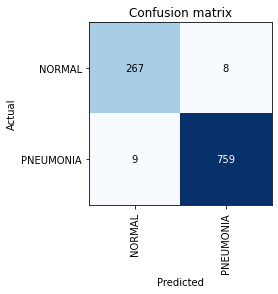

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

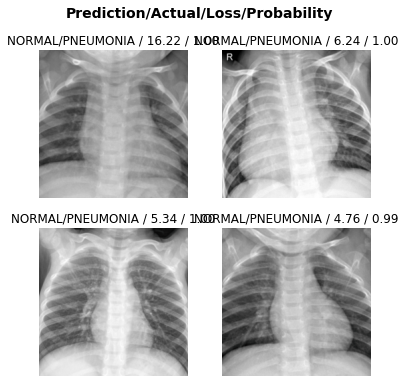

In [29]:
interp.plot_top_losses(4, nrows=2)

# Submission

In [30]:
submission = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')
submission.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [ ]:
predictions = []
for filename in submission['id']:
    pred, pred_id, probs = learn.predict(PILImage.create(f"/kaggle/input/pnevmoniya/test/{filename}"))
    predictions.append(
        0 if pred == 'NORMAL' else 1
    )

In [32]:
submission['labels'] = predictions
submission.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [33]:
submission.to_csv('submission.csv', index=False)